## Deviations from Normality

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import edhek_risk_kit as erk
import pandas as pd

In [3]:
hfi = erk.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


### Checking Frequency Distribution

<Axes: >

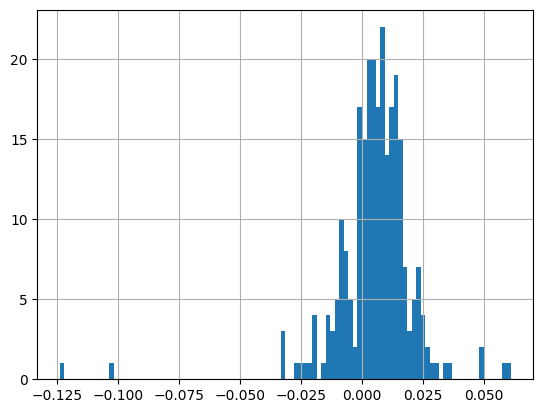

In [6]:
hfi["Convertible Arbitrage"].hist(bins=100)

<Axes: xlabel='Convertible Arbitrage', ylabel='Count'>

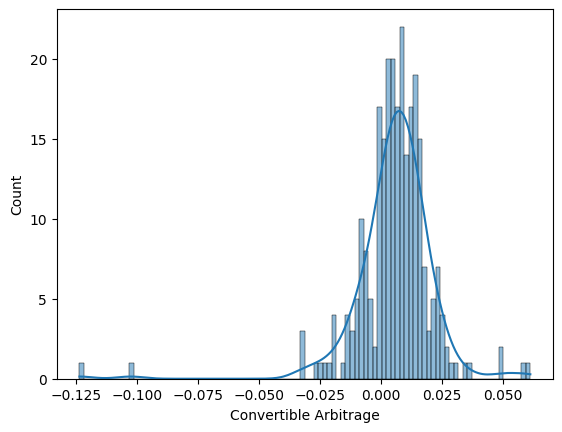

In [10]:
import seaborn as sns
sns.histplot(hfi["Convertible Arbitrage"], bins=100, kde=True)

In [17]:
pd.concat(
    [hfi.mean(), hfi.median(), hfi.mean() > hfi.median()], 
    axis="columns",
    keys=["mean", "median", "mean > median"]
)

,mean,median,mean > median
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


$$ S(R) = \frac{E[ (R - E(R))^3 ]}{\sigma_R^3} $$

In [28]:
erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [29]:
hfi.skew().sort_values()

Fixed Income Arbitrage   -3.962959
Convertible Arbitrage    -2.654757
Equity Market Neutral    -2.136641
Relative Value           -1.825900
Event Driven             -1.417250
Merger Arbitrage         -1.327668
Distressed Securities    -1.308316
Emerging Markets         -1.173773
Long/Short Equity        -0.392469
Funds Of Funds           -0.363862
CTA Global                0.174697
Short Selling             0.772387
Global Macro              0.988569
dtype: float64

In [31]:
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [63]:
import numpy as np
normal_rets = np.random.normal(0, 0.15, size=(263,1))

In [64]:
erk.skewness(normal_rets).item()

-0.17429721562017414

## Kurtosis

$$ K(R) = \frac{E[ (R - E(R))^4 ]}{\sigma_R^4} $$

In [44]:
erk.kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

<Axes: >

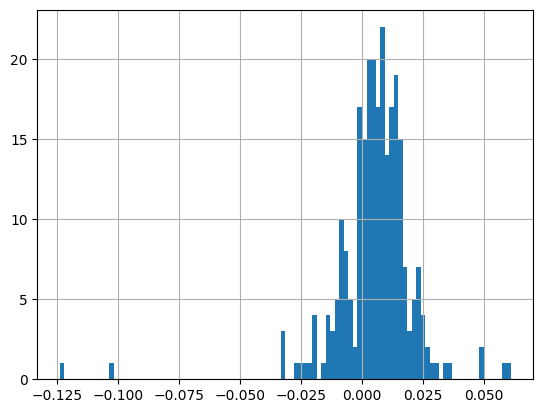

In [51]:
hfi["Convertible Arbitrage"].hist(bins=100)

In [50]:
erk.kurtosis(normal_rets).item()

2.988910337116024

In [54]:
# Already 3 is subtracted, so 0 for normal
scipy.stats.kurtosis(normal_rets)

array([-0.01108966])

In [53]:
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

## Test of normality using Jarque Bera

In [65]:
scipy.stats.jarque_bera(normal_rets)

SignificanceResult(statistic=np.float64(1.7993205400277188), pvalue=np.float64(0.4067078071105412))

#### What the numbers mean

statistic = 1.7993
This is the JB test statistic. Larger values indicate stronger departure from normality.

pvalue = 0.4067
This is the probability of observing such a statistic under the null hypothesis of normality.

**How to interpret**

Null hypothesis (H₀): Data are normally distributed.

Alternative hypothesis (H₁): Data are not normally distributed.

**Decision rule**:

If pvalue < α (say 0.05), reject H₀ → evidence against normality.

If pvalue ≥ α, fail to reject H₀ → no evidence against normality.

**Here**:

pvalue = 0.4067 > 0.05 → fail to reject H₀.

Conclusion: There is no strong evidence that the distribution is non-normal. The data could plausibly be normal.

In [66]:
scipy.stats.jarque_bera(hfi)

SignificanceResult(statistic=np.float64(25656.585999171337), pvalue=np.float64(0.0))

In [68]:
erk.is_normal(normal_rets).item()

True

In [70]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [75]:
hfi.aggregate(scipy.stats.jarque_bera).loc[1] > 0.01

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
Name: 1, dtype: bool

## Check the FFME Set

In [76]:
ffme = erk.get_ffme_returns()

In [77]:
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [79]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [80]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

In [81]:
ffme.aggregate(scipy.stats.jarque_bera)

,SmallCap,LargeCap
0,92509.396763,2748.437975
1,0.000000,0.000000
